In [1]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from PIL import Image

In [2]:
# loading the images
ahsan = Image.open('profile.png')
hat = Image.open('hat.png')
scarf = Image.open('scarf.png')
shades = Image.open('hat2.png')


In [3]:
def binary_image(img, threshold = None):
    
    grayscale = img.convert('L')
    numpy_image = np.asarray(grayscale).copy()
    if threshold == None:
        threshold = 170
    numpy_image[numpy_image < threshold] = 0
    numpy_image[numpy_image >= threshold] = 255
    binary_image = Image.fromarray(numpy_image)
    return binary_image


In [4]:
def resize_image(image, size):
    width = (size/float(image.size[0]))
    heigth = int((float(image.size[1])*float(width)))
    image = image.resize((size,heigth), Image.ANTIALIAS)
    return image
  

In [5]:
def inverse_image(image):
    inverse = np.invert(image)
    inverse_image = Image.fromarray(inverse)
    return inverse_image

In [6]:
ahsan_resize = resize_image(ahsan,350)

hat_resize = resize_image(hat, 165)
cap_mask = inverse_image(binary_image(hat_resize))

shades_resize = resize_image(shades,100)
shades_mask = inverse_image(binary_image(shades_resize,95))

scarf_resize = resize_image(scarf,170)
scarf_mask = inverse_image(binary_image(scarf_resize,220))


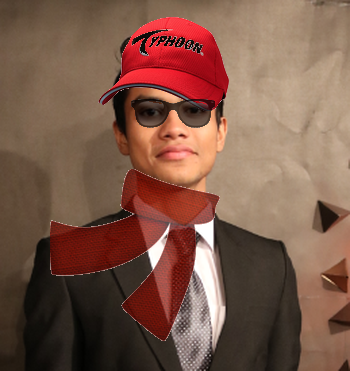

In [10]:
background = ahsan_resize.copy()
background.paste(hat_resize, (81, 16),cap_mask)
background_copy = background.copy()
background_copy.paste(shades_resize, (123,65), shades_mask)
background_copy.paste(scarf_resize, (50,169), scarf_mask)
finalImage = Image.blend(background, background_copy, alpha=0.7)
finalImage.save("finalImage.png")
finalImage